<a href="https://colab.research.google.com/github/SARANYA-4411/airbnb-booking-analysis/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Airbnb ,inc.is an American company that operates an online marketplace for lodging , primarily homestays for vacation rentals , and tourism activities . Airbnb to expand on traveling possibilities and present a more unique , personalized way of experiencing the world . Based in San Francisco, California, the platform is accessible via website and mobile app.
 

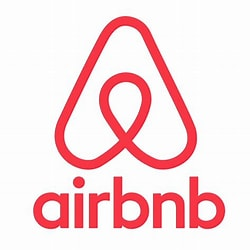

Let's start ;

Since 2008,  guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Nowadays, Airbnb became one of a kind service that is used by the whole world. Data analysts become a crucial factor for the company that provided millions of listings through Airbnb. These listings generate a lot of data that can be analyzed  and used for security, business decisions, understanding of customers and providers behavior on the platform, implementing innovative additional services, guiding marketing initiatives, and much more.

This dataset has around 49000  observations with 16 columns and it is a mix between categorical and numeric values.


Explore and analyze the data to discover key understandings (not limited to these) such as :
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

 We'll try to understand how the columns  variables relate , the categorical and numeric values.

Basic cleaning. We'll clean the dataset and handle the missing data, and categorical variables.

Test assumptions. We'll check if our data meets the assumptions required for analysis.
Now, it's time to have fun!

**index**

 1 Lets Invite Some Libraries 

2 Mounting our Drive.

3 Time To Do Basic Examination.

4 MOST NUMBER OF LISTING ,What Hosts And Areas are telling us?

5 what can we learn from predictions 

6 price and listing

7  find the Busiest Host.

8  Most Popular Neighbourhoods and Neighbourhood Areas.

9  Calculating The Difference Of Traffic Among Different Areas.

10 Conclusion.

# **# Mounting  Drive**

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **lets import libraries**

In [56]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns


In [57]:
df_air = pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')
df_air

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [58]:
df_air.shape

(48895, 16)

In [59]:
#lets look at the columns in this dataset
df_air.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

So what are the numerical and categorical variables?

By the  basic inspection  a particular property name will have one particular host_name hosted by that same individual but a particular host_name can have multiple properties in a area.

So, host_name is a categorical variable here. Also neighbourhood_group,neighbourhood and room_type fall into this category.

While id, latitude, longitude,price,minimum_nights,number_of_reviews,last_review, reviews_per_month calculated_host_listings_count, availability_365 are numerical variables

In [60]:
df_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [61]:
#summery of the numeric columns
df_air.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [62]:
df_air.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [63]:
#data preprocessing
df_air.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**observations** 

Here we have 4 null columns with null values . so we have to change these null values . 

1  names and host names are substituted 
2  last review is not much required so we drop this column
3 reviews per month column containig null values and we can simple put 0 reviews  by replacing NAN's

In [64]:
df_air['name'].fillna('unknown',inplace=True)
df_air['host_name'].fillna('no_name',inplace=True)

In [65]:
df_air= df_air.drop(['last_review'],axis=1)

In [66]:
df_air['reviews_per_month']=df_air['reviews_per_month'].replace(to_replace=np.nan,value=0).astype('int64')

In [67]:
df_air['reviews_per_month'].isnull().values.any()

False

In [68]:
# check number of unique values
df_air['id'].nunique()

48895

In [69]:
df_air['host_name'].nunique()

11453

In [70]:
df_air['name'].nunique()

47906

In [71]:
df_air.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

now there is no null vaues 

so the data is ready for analysys

## checking if there is any duplicate data

In [72]:
duplicate_data = df_air.duplicated()
print(duplicate_data.sum())
df_air[duplicate_data]

### there is no duplicate datas 

0


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


if we think like a travellor , the person trying to book a listing for stay/rent who should check the details like 
name, host_name, neighbour_type , minimum_night,number_of_reviews . these are the importent ones in our analysis. so we have to crosscheck through at last. 

# **Now taking necessary columns only**:

In [73]:
df = df_air[['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','price','minimum_nights', 'number_of_reviews','calculated_host_listings_count','availability_365']]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


# **Lets start our analysis**

# **Lets check the most no of listings in NYC .**

top 5 listings on Airbnb in entire NYC:


**what can we learn about different hosts and areas**.

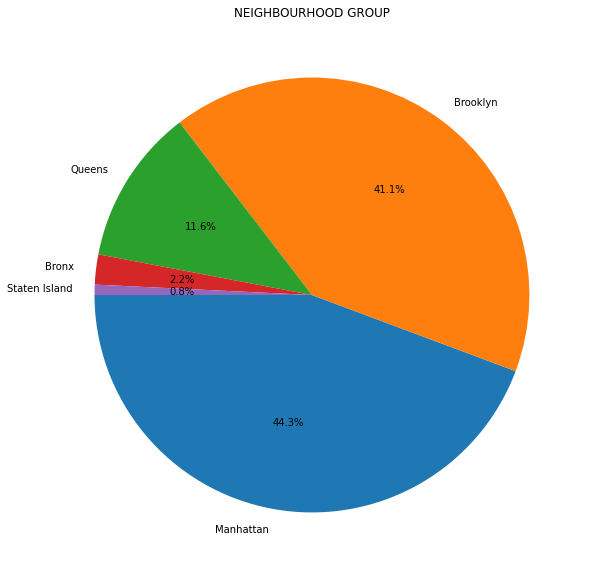

In [74]:
plt.figure(figsize=(10,10))
plt.title('NEIGHBOURHOOD GROUP')
plt.pie(df.neighbourhood_group.value_counts(),labels=df.neighbourhood_group.value_counts().index,autopct='%1.1f%%',startangle=180)
plt.show()

From the above pie chart we can understand that airbnb listing are near Manhattan,and brooklyn has the highest share of hotels

In [75]:
listings_count_df=df_air['name'].value_counts()[:5].reset_index()
listings_count_df.rename(columns={'index':'Listings on Airbnb','name':'Total_listings'},inplace=True)
listings_count_df

,Listings on Airbnb,Total_listings
0,Hillside Hotel,18
1,Home away from home,17
2,unknown,16
3,New york Multi-unit building,16
4,Brooklyn Apartment,12


from the above table we found that hillside hotel have more listing in entire NYC followed by home away from home , New york Multi-unit building,
Brooklyn Apartment	,Loft Suite @ The Box House Hotel	

In [76]:
top_10_hosts=df_air['host_name'].value_counts()[:10].reset_index()
top_10_hosts.rename(columns={'index':'host_name','host_name':'no-of-property'},inplace=True)

top_10_hosts

,host_name,no-of-property
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


Text(0, 0.5, 'Number of listings')

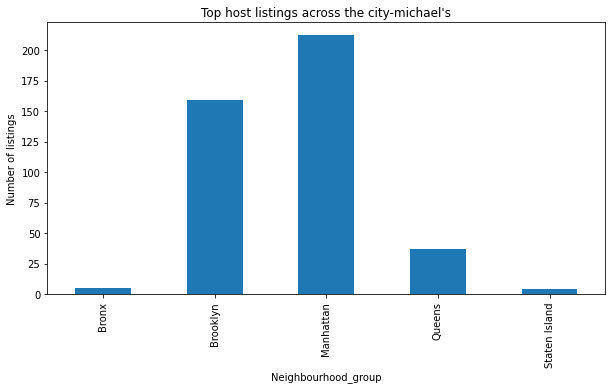

In [77]:
plt.figure(figsize=(10,5))
df_h=df[df_air['host_name']=='Michael']
host_listings=df_h.groupby(['neighbourhood_group'])['name'].count()
host_listings.plot(kind='bar')
plt.title(label="Top host listings across the city-michael's")
plt.xlabel(xlabel='Neighbourhood_group')
plt.ylabel(ylabel='Number of listings')

top host is michael and most of the michaels properties located in manhattan

Text(0.5, 1.0, 'NO  OF LISTING IN ENTIRE NYC OF EACH NEIGHBOURHOOD GROUP')

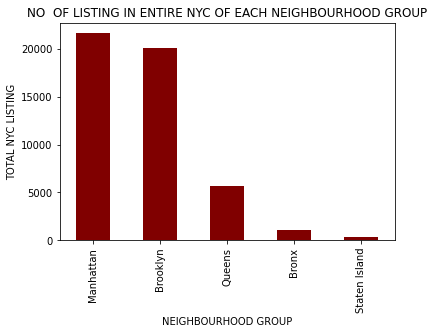

In [78]:
df_air['neighbourhood_group'].value_counts().plot(kind='bar',color='maroon')
plt.xlabel('NEIGHBOURHOOD GROUP')
plt.ylabel('TOTAL NYC LISTING')
plt.title('NO  OF LISTING IN ENTIRE NYC OF EACH NEIGHBOURHOOD GROUP')

most no of listings in entire nyc of each neighbourhood is manhattan

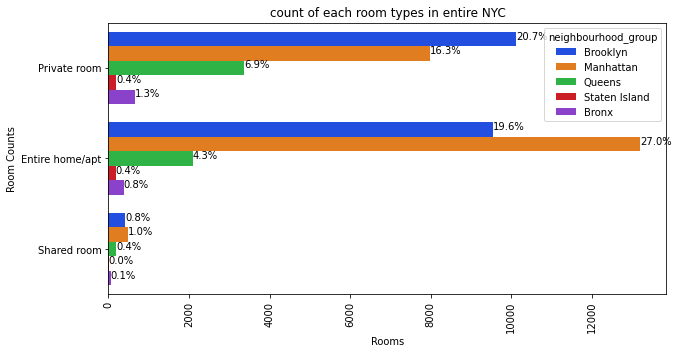

In [79]:
plt.rcParams['figure.figsize'] = (10,5)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=df_air,palette='bright')

total = len(df_air['room_type'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

From the above graph we observe that Manhattan has more listed properties with entire home/apt around 27% of total listed properties followed by bookklyn with around 19.6%

in case of private room , in booklyn its 20.7% of the ttal listed properties followed by manhattan with 16.3% . while 6.9% of private rooms are from Queens 

Only a few of the total listed have shared rooms listed on Airbnb where there's rare or negligible shared rooms in  Staten Island and Bronx.

from the above findings , we understand that Brooklyn , Queens,Bronx has more private room types while Manhattan has the highest no of listings in entire NYC (ie more entire home/apt room types )

In [80]:
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.nlargest(10,'calculated_host_listings_count').reset_index(drop=True)

,host_name,neighbourhood_group,calculated_host_listings_count
0,Sonder (NYC),Manhattan,327
1,Blueground,Brooklyn,232
2,Blueground,Manhattan,232
3,Kara,Manhattan,121
4,Kazuya,Brooklyn,103
5,Kazuya,Manhattan,103
6,Kazuya,Queens,103
7,Jeremy & Laura,Manhattan,96
8,Sonder,Manhattan,96
9,Corporate Housing,Manhattan,91


In [81]:
hosts_areas.nsmallest(5,'calculated_host_listings_count').reset_index(drop=True)

,host_name,neighbourhood_group,calculated_host_listings_count
0,'Cil,Queens,1
1,(Ari) HENRY LEE,Manhattan,1
2,(Email hidden by Airbnb),Brooklyn,1
3,(Mary) Haiy,Brooklyn,1
4,-TheQueensCornerLot,Queens,1


In [82]:
df_plot = df.drop(['host_name'],axis=1)

<Figure size 720x720 with 0 Axes>

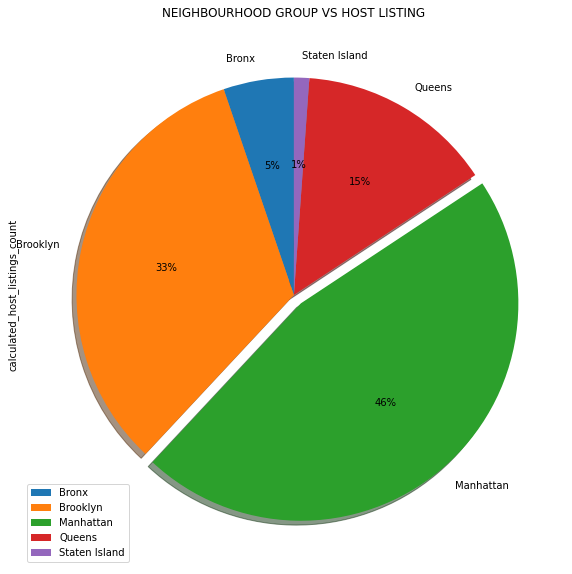

<Figure size 720x720 with 0 Axes>

In [83]:
explode =(0,0,0.05,0,0)
df_plot.groupby(['neighbourhood_group']).max().plot(kind='pie', explode=explode ,figsize=(10,10) ,y='calculated_host_listings_count',shadow=True,startangle=90,autopct='%1.0f%%',title= 'NEIGHBOURHOOD GROUP VS HOST LISTING')
plt.figure(figsize=(10,10))

from the above table we can understand that the most number of listings are from **manhattan **

also this pie  chart shows most number of host listing are in manhattan followed by brooklyn 





# **what can we learn from predictions ?**
# **locations , prices, reviews, etc...**




In [84]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews.sort_values(by='number_of_reviews',ascending=False).head(5)

,neighbourhood_group,number_of_reviews
3,Queens,629
2,Manhattan,607
1,Brooklyn,488
4,Staten Island,333
0,Bronx,321


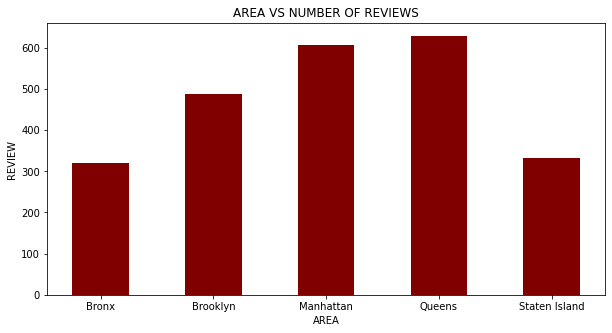

In [85]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize=(10,5))


plt.bar(area , review , color = 'maroon', width = 0.5)
plt.xlabel('AREA')
plt.ylabel('REVIEW')
plt.title('AREA VS NUMBER OF REVIEWS')
plt.show()

In [86]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head()

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


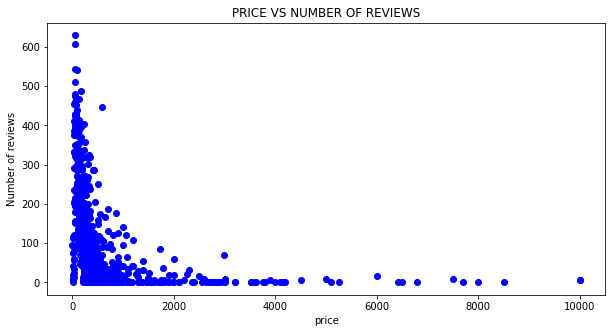

In [87]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize=(10,5))

###plotting a graph

plt.scatter(area , price , color='blue')

plt.xlabel('price')
plt.ylabel('Number of reviews')
plt.title('PRICE VS NUMBER OF REVIEWS')
plt.show()

From the above analysis we can say that most people prefer to stay in place where price is less 

# **lets look at the distribution of the listings with availability.**

In [88]:
availability_type=df.groupby(['neighbourhood_group','room_type'])['availability_365'].max().reset_index()
availability_type=availability_type.sort_values(by='availability_365',ascending=False).head(10)
availability_type

,neighbourhood_group,room_type,availability_365
0,Bronx,Entire home/apt,365
1,Bronx,Private room,365
2,Bronx,Shared room,365
3,Brooklyn,Entire home/apt,365
4,Brooklyn,Private room,365
5,Brooklyn,Shared room,365
6,Manhattan,Entire home/apt,365
7,Manhattan,Private room,365
8,Manhattan,Shared room,365
9,Queens,Entire home/apt,365


ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_air,palette

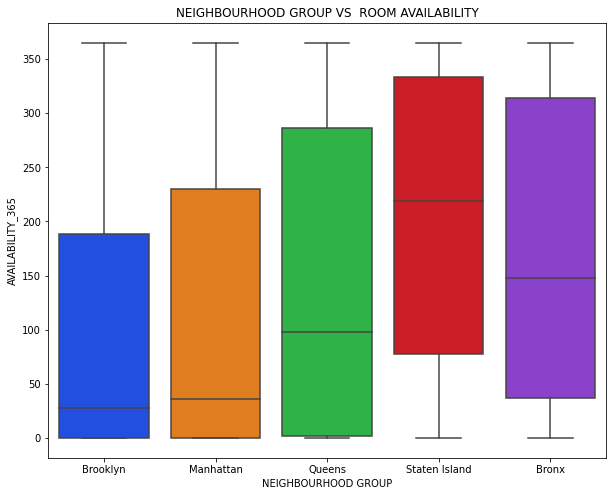

In [89]:
f,ax = plt.subplots(figsize=(10,8))
ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=df_air,palette="bright")
plt.title("NEIGHBOURHOOD GROUP VS  ROOM AVAILABILITY")
plt.xlabel('NEIGHBOURHOOD GROUP')
plt.ylabel('AVAILABILITY_365')
plt.show()

FROM THE ABOVE GRAPH WE CAN FIND THAT STATEN ISLAND SEEMS TO BE MORE AVAILABLE THROUGHOUT THE YEAR IT IS AVAILABLE MORE THAN 300 DAYS IN A YEAR.

# *** WHICH HOSTS ARE THE BUSIEST AND WHY?***

In [90]:
busiest_host = df.groupby (['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_host=busiest_host.sort_values(by='number_of_reviews',ascending=False).head(10)
busiest_host

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


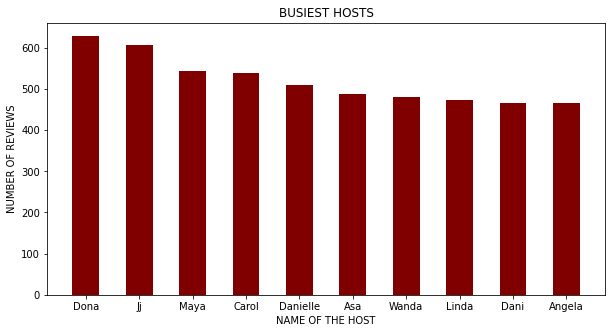

In [91]:
name = busiest_host['host_name']
reviews = busiest_host['number_of_reviews']

fig = plt.figure(figsize = (10,5))

#creating bar graph  

plt.bar(name , reviews , color = 'maroon' , width =0.5)

plt.xlabel('NAME OF THE HOST')
plt.ylabel('NUMBER OF REVIEWS')
plt.title('BUSIEST HOSTS')
plt.show()

FROM THE ABOVE ANALYSIS WE CAN FIGURE OUT THAT THE BUSIEST HOSTS ARE 
DONA , JI, MAYA, CAROL, DANIELLE

DONA is the most reviewed host with more thean 600 reviews .so  we can undersatand that dona is the most busiest host .

also most preferred room type is private room and entire room 



# **Traffic among different areas , reasons behind it**

Here we are checking the number of people visited in different neighbourhood 



first analyse with 
no of reviews and neighbourhood groups
```

```



In [92]:
most_reviewed = df.groupby(['neighbourhood_group'])['number_of_reviews'].sum().reset_index()
most_reviewed.sort_values(by='number_of_reviews',ascending =False).head(10)

,neighbourhood_group,number_of_reviews
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
0,Bronx,28371
4,Staten Island,11541


In [93]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas                                    

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


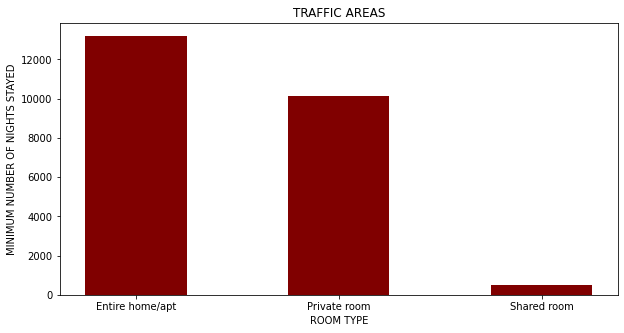

In [94]:
room_type = traffic_areas['room_type']
stay=traffic_areas['minimum_nights']

fig = plt.figure(figsize=(10,5))

#cretting bar graph
plt.bar(room_type,stay, color='maroon',width = 0.5)

plt.xlabel('ROOM TYPE')
plt.ylabel('MINIMUM NUMBER OF NIGHTS STAYED')
plt.title('TRAFFIC AREAS')
plt.show()

from this graph  we can analys that most  people prefer entire home/apt and then private room which are in manhattan ,queens ,brooklyn

# **now just find how many nights people stayed in each neighbourhood group**

Text(0, 0.5, 'Min Stays')

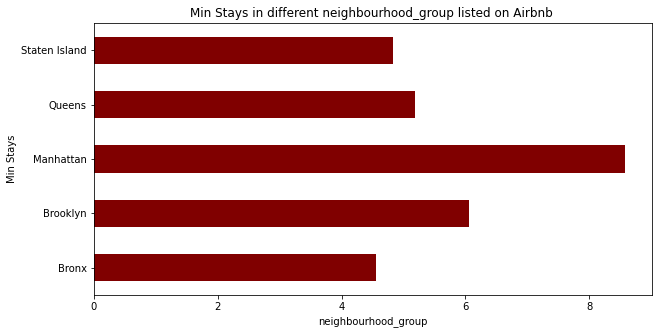

In [95]:
# min_night= df_air['neighbourhood_group']
df_air.groupby('neighbourhood_group')['minimum_nights'].mean().plot(kind='barh',color='maroon')
plt.title('Min Stays in different neighbourhood_group listed on Airbnb ')
plt.xlabel('neighbourhood_group')
plt.ylabel('Min Stays')

from this observations people mostly living in manhattan on an average of more than 8 nights followed by guests who stayed in  brooklyn where average stay is 6 nights . so  we figure out that most people prefer to stay in manhattan .

# **Conclusion:**


# 1. The people who prefer to stay in Entire home or Apartment they are going to stay bit longer in that particular Neighbourhood only.

# 2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.. 

# 3. Most visitors don't prefer shared rooms, they tend to visit private room or entire home.


# 4. Most people prefer to pay less price.

# 5. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

# 6. If people are not staying more then one night means they are travellers. 

# 7.Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NYC

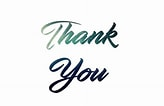